In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 

import warnings
warnings.filterwarnings("ignore")

print('module loaded')

module loaded


Data Processing


In [50]:
data = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')


In [51]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [52]:
data.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [53]:
data.select_dtypes('object')

,customer name,customer e-mail,country
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil
...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe
497,Pearl,penatibus.et@massanonante.com,Philippines
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana


In [54]:
data.select_dtypes('object'). nunique

<bound method DataFrame.nunique of        customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  
0        Bulgaria  
1          Belize  
2   

In [55]:
data.drop(columns= ['customer name' , 'customer e-mail' , 'country' , 'gender'] , axis = 1 , inplace = True)

In [56]:
data.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [57]:
target = 'car purchase amount'
X = data .drop(target , axis = 1)
Y = data[target]

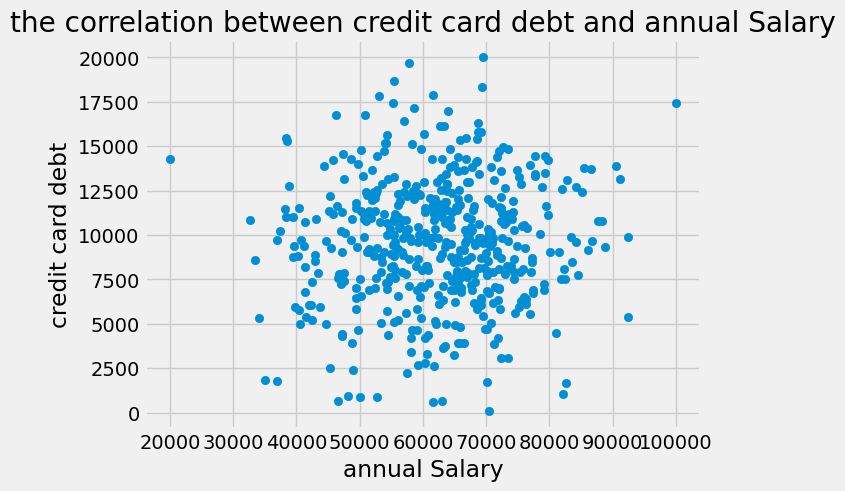

In [58]:
#Creating a scatter plot to show the distribution between 'credit card debt' and 'annual salary'

plt.scatter(data['annual Salary'] , data['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('the correlation between credit card debt and annual Salary');

In [59]:
#Creating a Scatter plot to show the distrbution between 'car purchase amountcar purchase amount' and 'annual Salary'
fig = px.scatter(x= data['annual Salary'] , y= data['car purchase amount'] , title = 'The correlation between annual Salary and car purchase amountcar purchase amount ')
fig.update_layout(xaxis_title= 'annual Salary' , yaxis_title = 'car purchase amount')
fig.show()

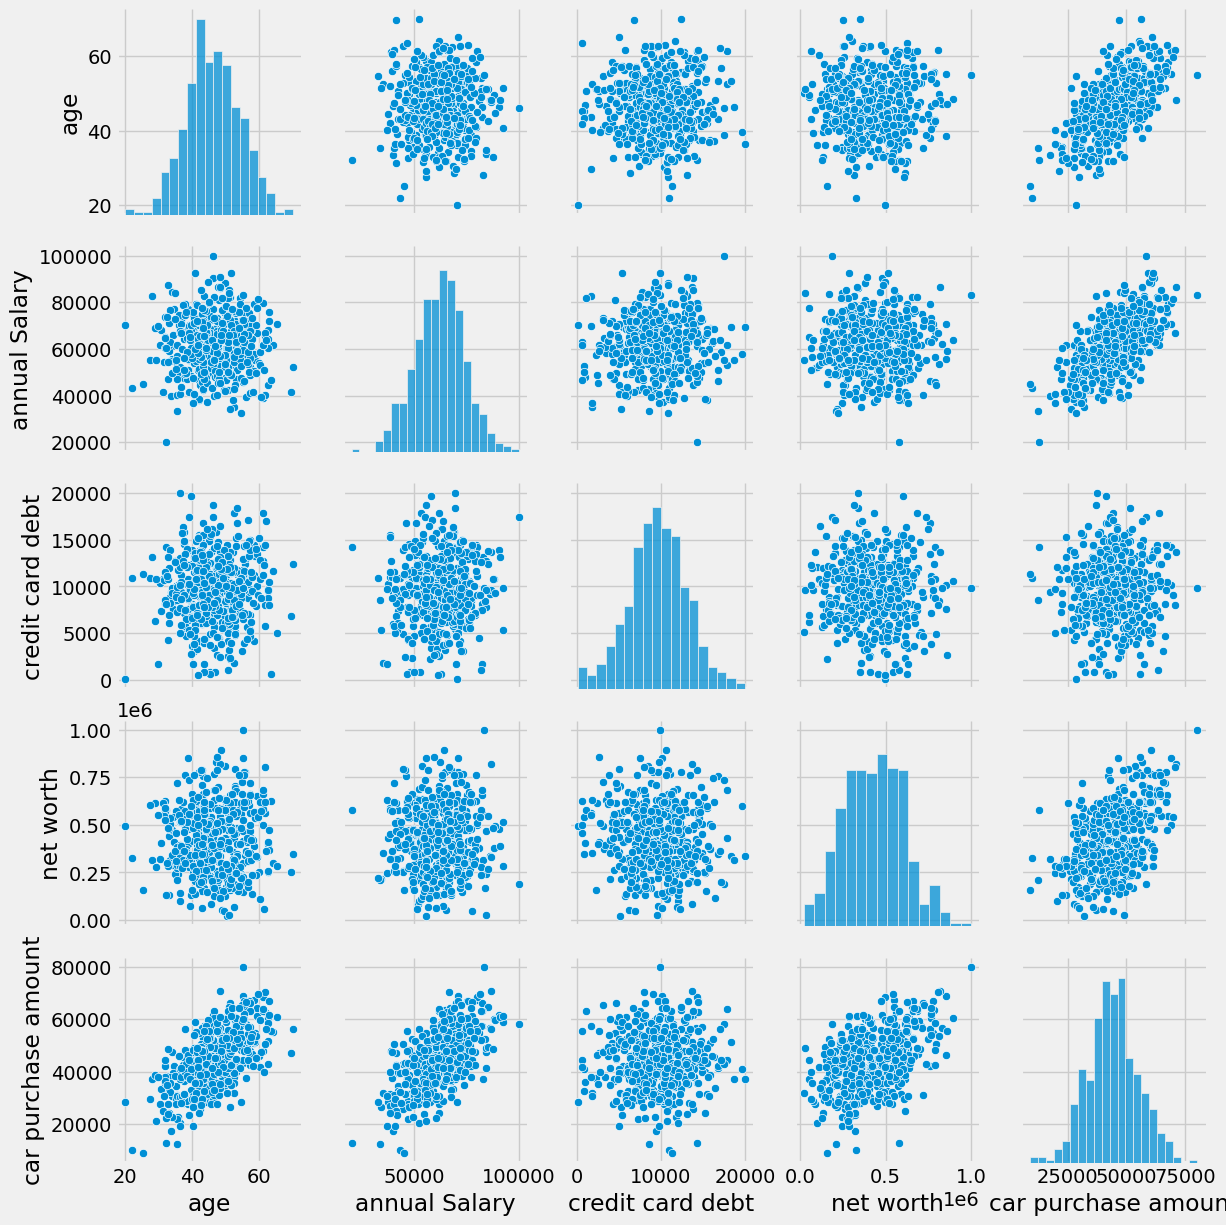

In [60]:
sns.pairplot(data) ;

Spliting the data into X and Y

In [61]:
print(f'The shape of X is {X.shape}')
print(f'The shape of Y is {Y.shape}')

The shape of X is (500, 4)
The shape of Y is (500,)


Data Scaling


In [62]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1 , 1))

Splting the data into Y train & test and X train & test

In [63]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y ,test_size= 0.2, random_state=42 )

print(f'the shape of X train is {X_train.shape}')
print(f'the shape of Y train is {Y_train.shape}')
print(f'the shape of X test is {X_test.shape}')
print(f'the shape of Y test is {Y_test.shape}')

the shape of X train is (400, 4)
the shape of Y train is (400, 1)
the shape of X test is (100, 4)
the shape of Y test is (100, 1)


BaseLine

In [64]:
Y_mean = Y_train.mean()
Y_pred_baseline = [Y_mean] * len(Y_train)
print("Mean apt price:", Y_mean)
print("Baseline MAE:", mean_absolute_error(Y_train, Y_pred_baseline))

Mean apt price: 0.49219817948908456
Baseline MAE: 0.11921386215413556


Model Structure

In [65]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 4))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Iterate

In [66]:
history = model.fit(X_train , Y_train , epochs = 50 , validation_split = 0.2)

Epoch 1/50


10/10 [==============================] - 1s 12ms/step - loss: 0.2406 - mean_absolute_error: 0.4566 - val_loss: 0.1658 - val_mean_absolute_error: 0.3746
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1486 - mean_absolute_error: 0.3493 - val_loss: 0.0946 - val_mean_absolute_error: 0.2733
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0841 - mean_absolute_error: 0.2507 - val_loss: 0.0485 - val_mean_absolute_error: 0.1856
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0438 - mean_absolute_error: 0.1706 - val_loss: 0.0240 - val_mean_absolute_error: 0.1195
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0229 - mean_absolute_error: 0.1178 - val_loss: 0.0156 - val_mean_absolute_error: 0.0946
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.1000 - val_loss: 0.0149 - val_mean_absolute_error: 0.0935
Epoch 7/50
10/10 [====================

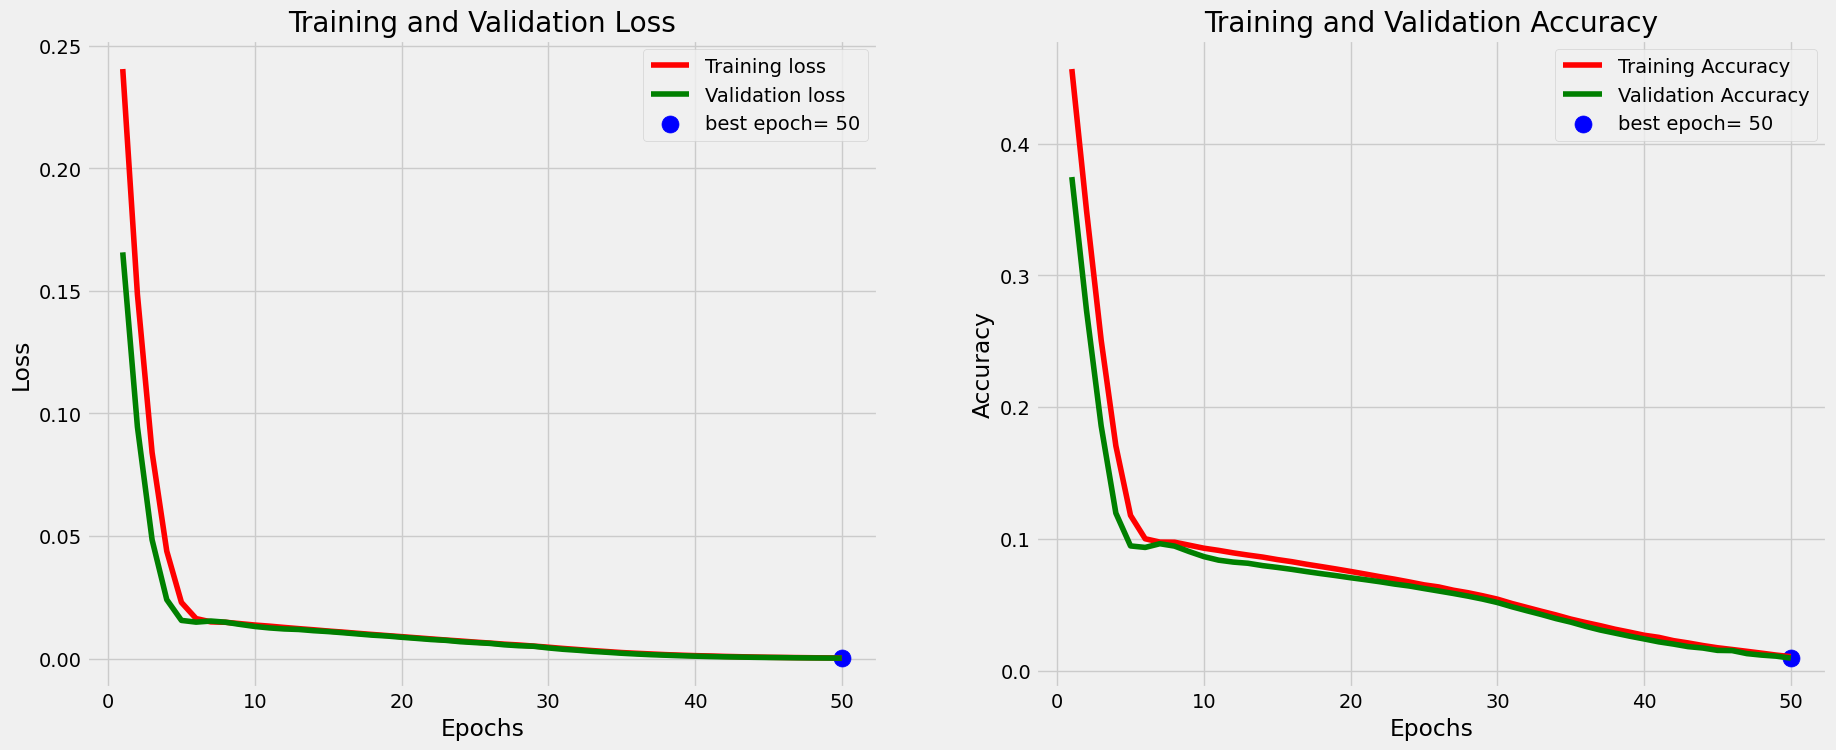

In [67]:
# Defining needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

Final Prediction

In [68]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [69]:
from sklearn.metrics import r2_score

In [70]:
test_acc = r2_score(Y_test , Y_pred)
print(f'R2 Score = {test_acc}')

R2 Score = 0.9936674300450967
